In [7]:
import string

In [9]:
letters = string.ascii_letters + " .,;'"
num_letters = len(letters)

In [10]:
letters

"abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ .,;'"

In [11]:
num_letters

57

In [13]:
import unicodedata

In [17]:
def unicodeToAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
        and c in letters
    )

In [18]:
print(unicodeToAscii('Ślusàrski'))

Slusarski


In [19]:
category_lines = {}
all_categories = []

In [20]:
files = !ls data/names/*.txt

In [21]:
files

['data/names/Arabic.txt',
 'data/names/Chinese.txt',
 'data/names/Czech.txt',
 'data/names/Dutch.txt',
 'data/names/English.txt',
 'data/names/French.txt',
 'data/names/German.txt',
 'data/names/Greek.txt',
 'data/names/Irish.txt',
 'data/names/Italian.txt',
 'data/names/Japanese.txt',
 'data/names/Korean.txt',
 'data/names/Polish.txt',
 'data/names/Portuguese.txt',
 'data/names/Russian.txt',
 'data/names/Scottish.txt',
 'data/names/Spanish.txt',
 'data/names/Vietnamese.txt']

In [22]:
import os

In [39]:
def readLines(file):
    lines = open(file, encoding='utf-8').read().strip().split('\n')
    return [unicodeToAscii(line) for line in lines]

In [40]:
files[1][11:-4]

'Chinese'

In [41]:
for file in files:
    category = file[11:-4]
    all_categories.append(category)
    lines = readLines(file)
    category_lines[category] = lines

In [42]:
n_categories = len(all_categories)

In [43]:
n_categories

22

In [44]:
print(category_lines['Italian'][:5])

['Abandonato', 'Abatangelo', 'Abatantuono', 'Abate', 'Abategiovanni']


In [45]:
import torch

In [50]:
def letterToIndex(letter):
    return letters.find(letter)

In [51]:
def letterToTensor(letter):
    tensor = torch.zeros(1, num_letters)
    tensor[0][letterToIndex(letter)] = 1
    return tensor

In [52]:
def lineToTensor(line):
    tensor = torch.zeros(len(line), 1, num_letters)
    for li, letter in enumerate(line):
        tensor[li][0][letterToIndex(letter)] = 1
    return tensor

In [53]:
print(letterToTensor('J'))
print(lineToTensor('Jones').size())

tensor([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])
torch.Size([5, 1, 57])


In [54]:
import torch.nn as nn

In [55]:
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()
        
        self.hidden_size = hidden_size
        
        self.i2h = nn.Linear(input_size+hidden_size, hidden_size)
        
        self.i2o = nn.Linear(input_size+hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)
        
    def forward(self, input, hidden):
        combined = torch.cat((input, hidden), 1)
        hidden = self.i2h(combined)
        output = self.i2o(combined)
        
        output = self.softmax(output)
        
        return output, hidden
    
    def initHidden(self):
        return torch.zeros(1, self.hidden_size)

In [56]:
n_hidden = 128

In [57]:
rnn = RNN(num_letters, n_hidden, n_categories)

In [58]:
input = letterToTensor('A')

In [59]:
hidden = torch.zeros(1, n_hidden)

In [60]:
output, next_hidden = rnn(input, hidden)

In [61]:
output

tensor([[-3.1897, -3.1363, -3.0598, -2.9606, -3.0735, -3.1315, -3.0669,
         -3.1346, -3.1465, -3.0905, -2.9989, -3.1425, -3.1447, -3.0729,
         -3.1263, -3.0994, -3.1247, -3.1454, -3.0586, -2.9996, -3.0532,
         -3.0812]])

In [62]:
next_hidden

tensor([[-0.0305, -0.0411,  0.0022,  0.0796,  0.0260,  0.1138, -0.0190,
          0.0120,  0.0963, -0.1172, -0.0539,  0.0630, -0.0062,  0.0600,
         -0.0549,  0.0117, -0.0054,  0.0747,  0.0512, -0.0601,  0.0056,
         -0.0675,  0.0354,  0.0121, -0.0005, -0.0605, -0.0060, -0.0280,
         -0.0272, -0.0106, -0.0272,  0.0871,  0.0048, -0.0951, -0.0176,
          0.0594, -0.0278,  0.0455, -0.1180, -0.0396,  0.0776,  0.0031,
          0.0047, -0.0752, -0.0758,  0.0279,  0.0491,  0.0726,  0.0035,
          0.0087, -0.0346, -0.0932, -0.0038,  0.0811, -0.0105, -0.0830,
          0.0193,  0.0712, -0.1026,  0.0598,  0.0242, -0.0277,  0.0510,
         -0.1019,  0.0070,  0.0013, -0.0836, -0.1102, -0.0600,  0.0013,
         -0.0487,  0.0729, -0.0455,  0.0582,  0.0358,  0.0785,  0.0151,
          0.0196, -0.0149,  0.1219, -0.0497,  0.0183,  0.1331, -0.0112,
         -0.0883, -0.0070,  0.0573,  0.0289,  0.0144,  0.0236,  0.0144,
          0.0795, -0.0274, -0.0522, -0.0243, -0.1076, -0.0912,  

In [63]:
input = lineToTensor('Albert')
hidden = torch.zeros(1, n_hidden)

In [64]:
output, next_hidden = rnn(input[0], hidden)

In [65]:
output

tensor([[-3.1897, -3.1363, -3.0598, -2.9606, -3.0735, -3.1315, -3.0669,
         -3.1346, -3.1465, -3.0905, -2.9989, -3.1425, -3.1447, -3.0729,
         -3.1263, -3.0994, -3.1247, -3.1454, -3.0586, -2.9996, -3.0532,
         -3.0812]])

In [66]:
def categoryFromOutput(output):
    top_n, top_i = output.topk(1)
    category_i = top_i[0].item()
    
    return all_categories[category_i], category_i

In [67]:
print(categoryFromOutput(output))

('Arabic', 3)


In [68]:
import random

In [69]:
def randomChoice(l):
    return l[random.randint(0, len(l)-1)]

In [70]:
def randomTrainingExample():
    category = randomChoice(all_categories)
    line = randomChoice(category_lines[category])
    
    category_tensor = torch.tensor([all_categories.index(category)], dtype=torch.long)
    line_tensor = lineToTensor(line)
    
    return category, line, category_tensor, line_tensor

In [71]:
for i in range(10):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    print('category =', category, '/ line =', line)

category = Arabic / line = Moghadam
category = Arabic / line = Arian
category = Chinese / line = Jiu
category = Polish / line = Malinowski
category = Arabic / line = Hanania
category = Arabic / line = Kanaan
category = Portuguese / line = Pereira
category = Arabic / line = Bahar
category = Czech / line = Zelinka
category = Scottish / line = Docherty


In [72]:
criterion = nn.NLLLoss()

In [73]:
learning_rate = 0.005

In [74]:
def train(category_tensor, line_tensor):
    hidden = rnn.initHidden()
    
    rnn.zero_grad()
    
    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)
        
    loss = criterion(output, category_tensor)
    loss.backward()
    
    for p in rnn.parameters():
        p.data.add_(-learning_rate, p.grad.data)
        
    return output, loss.item()

In [75]:
import time
import math

In [76]:
n_iters = 100000
print_every = 5000
plot_every = 1000

In [77]:
current_loss = 0
all_losses = []

In [78]:
def timeSince(since):
    now = time.time()
    s = now-since
    m = math.floor(s/60)
    s -= m*60
    
    return '%dm %ds' % (m, s)

In [80]:
start = time.time()

for iter in range(1, n_iters+1):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    output, loss = train(category_tensor, line_tensor)
    current_loss += loss
    
    if iter % print_every == 0:
        guess, guess_i = categoryFromOutput(output)
        correct = '✓' if guess == category else '✗ (%s)' % category
        print('%d %d%% (%s) %.4f %s / %s %s' % (iter, iter / n_iters * 100, timeSince(start), loss, line, guess, correct))

    if iter % plot_every == 0:
        all_losses.append(current_loss / plot_every)
        current_loss = 0

5000 5% (0m 4s) 0.7635 Harb / Arabic ✓
10000 10% (0m 8s) 1.4834 Kwong / Chinese ✓
15000 15% (0m 12s) 4.3871 Hay / Chinese ✗ (Scottish)
20000 20% (0m 16s) 2.3229 Rademaker / Russian ✗ (Dutch)
25000 25% (0m 20s) 0.9308 Cham / Arabic ✓
30000 30% (0m 24s) 0.6042 Isa / Arabic ✓
35000 35% (0m 28s) 1.2568 Rotolo / Spanish ✗ (Italian)
40000 40% (0m 32s) 2.5321 Feld / Scottish ✗ (German)
45000 45% (0m 37s) 0.1279 Ferreiro / Portuguese ✓
50000 50% (0m 42s) 0.0632 Tahan / Arabic ✓
55000 55% (0m 47s) 1.7773 Chai / Arabic ✗ (Chinese)
60000 60% (0m 52s) 1.8511 Owens / Dutch ✗ (English)
65000 65% (0m 56s) 0.1213 Mikhalychev / Russian ✓
70000 70% (1m 0s) 3.0815 Lim  / French ✗ (Korean)
75000 75% (1m 5s) 1.2866 Szewc / Polish ✓
80000 80% (1m 9s) 0.8885 Giang / Vietnamese ✓
85000 85% (1m 13s) 1.0634 Cham / Arabic ✓
90000 90% (1m 17s) 3.5100 Silva / Czech ✗ (Portuguese)
95000 95% (1m 21s) 1.7519 Raitsin / Scottish ✗ (Russian)
100000 100% (1m 25s) 1.2011 Aiza / Spanish ✓


In [81]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

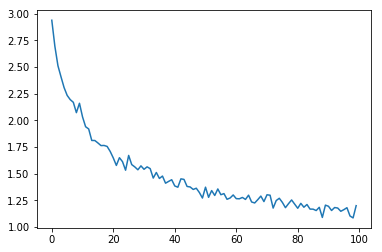

In [82]:
plt.figure()
plt.plot(all_losses)

In [83]:
confusion = torch.zeros(n_categories, n_categories)
n_confusion = 10000

In [84]:
def evaluate(line_tensor):
    hidden = rnn.initHidden()
    
    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)
        
    return output

In [85]:
for i in range(n_confusion):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    output = evaluate(line_tensor)
    
    guess, guess_i = categoryFromOutput(output)
    category_i = all_categories.index(category)
    confusion[category_i][guess_i] += 1

In [86]:
for i in range(n_categories):
    confusion[i] = confusion[i]/confusion[i].sum()

In [89]:
all_categories

['Arabic',
 'Arabic',
 'Arabic',
 'Arabic',
 'Arabic',
 'Chinese',
 'Czech',
 'Dutch',
 'English',
 'French',
 'German',
 'Greek',
 'Irish',
 'Italian',
 'Japanese',
 'Korean',
 'Polish',
 'Portuguese',
 'Russian',
 'Scottish',
 'Spanish',
 'Vietnamese']

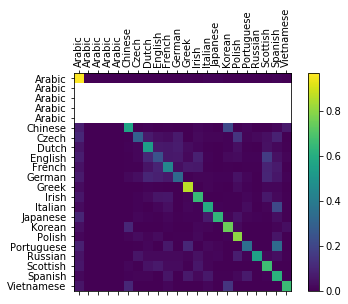

In [88]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(confusion.numpy())
fig.colorbar(cax)

ax.set_xticklabels([''] + all_categories, rotation=90)
ax.set_yticklabels([''] + all_categories)

ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

plt.show()

In [92]:
def predict(input_line, n_predictions=3):
    print('\n> %s' % input_line)
    with torch.no_grad():
        output = evaluate(lineToTensor(input_line))
        
        topv, topi = output.topk(n_predictions, 1, True)
        predictions = []
        
        for i in range(n_predictions):
            value = topv[0][i].item()
            
            category_index = topi[0][i].item()
            print('(%.2f) %s' % (value, all_categories[category_index]))
            predictions.append([value, all_categories[category_index]])


In [93]:
predict('Jackson')


> Jackson
(-0.11) Scottish
(-2.75) English
(-4.27) Dutch


In [94]:
predict('Paulo')


> Paulo
(-0.92) Portuguese
(-1.38) Italian
(-1.38) Spanish


In [95]:
predict('Manoel')


> Manoel
(-1.15) Irish
(-1.84) Arabic
(-2.12) French


In [97]:
predict('Alice')


> Alice
(-1.53) English
(-1.78) French
(-2.28) Czech
